<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-03-03 12:03:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-03-03 12:03:43 (85.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
#test_df = pd.read_csv('loan_test.csv')
#test_df.head()

In [6]:
#df = pd.read_csv('loan_test.csv')
#df.head()

In [7]:
df.shape

(346, 10)

### Convert to date time object


In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [10]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



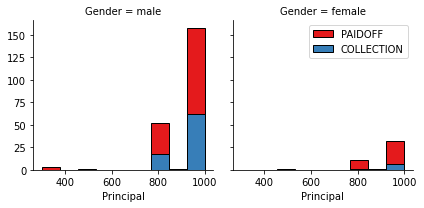

In [11]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

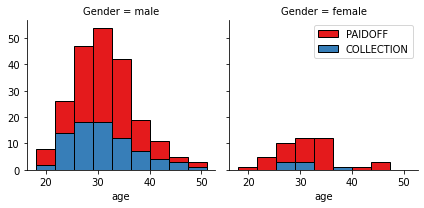

In [12]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


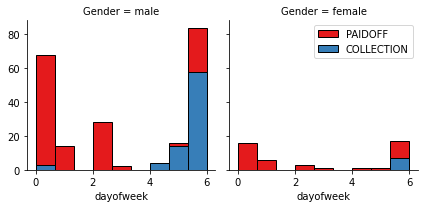

In [13]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [14]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [15]:
df[['weekend']].value_counts()

weekend
1          205
0          141
dtype: int64

## Convert Categorical features to numerical values


Let's look at gender:


In [16]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [17]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [18]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [19]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [20]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [21]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [22]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [26]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


## Train Test split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

### Looking for the best K. Option 1

In [34]:
for k in range(1, 11):
    knn_model  = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    knn_yhat = knn_model.predict(X_test)
    print("For K = {} accuracy = {}".format(k,accuracy_score(y_test,knn_yhat)))

For K = 1 accuracy = 0.6428571428571429
For K = 2 accuracy = 0.5857142857142857
For K = 3 accuracy = 0.7428571428571429
For K = 4 accuracy = 0.7
For K = 5 accuracy = 0.7428571428571429
For K = 6 accuracy = 0.7142857142857143
For K = 7 accuracy = 0.8
For K = 8 accuracy = 0.7571428571428571
For K = 9 accuracy = 0.7571428571428571
For K = 10 accuracy = 0.6857142857142857


### Looking for the best K. Option 2

In [39]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    knn_model = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    knn_yhat=knn_model.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, knn_yhat)
    std_acc[n-1]=np.std(knn_yhat==y_test)/np.sqrt(knn_yhat.shape[0])

mean_acc

array([0.64285714, 0.58571429, 0.74285714, 0.7       , 0.74285714,
       0.71428571, 0.8       , 0.75714286, 0.75714286])

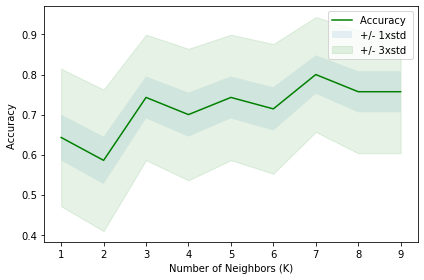

In [40]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [41]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8 with k= 7


### Accuracy Evaluation

In [51]:
k = 7
#Train Model and Predict  
knn_model_best = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn_yhat_best = knn_model_best.predict(X_test)
knn_model_best

KNeighborsClassifier(n_neighbors=7)

In [54]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model_best.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, knn_yhat_best))

Train set Accuracy:  0.8043478260869565
Test set Accuracy:  0.8


### Jaccard index + F1 Score

In [66]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, knn_model_best.predict(X_train), pos_label="PAIDOFF"))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, knn_yhat_best, pos_label="PAIDOFF"))
print('\n')
print("Train set Accuracy (F1): ", f1_score(y_train, knn_model_best.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, knn_yhat_best, average='weighted'))

Train set Accuracy (Jaccard):  0.7759336099585062
Test set Accuracy (Jaccard):  0.7777777777777778


Train set Accuracy (F1):  0.7942614463042823
Test set Accuracy (F1):  0.7946428571428571


F1 Score Classification Report

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_yhat_best))

              precision    recall  f1-score   support

  COLLECTION       0.54      0.47      0.50        15
     PAIDOFF       0.86      0.89      0.88        55

    accuracy                           0.80        70
   macro avg       0.70      0.68      0.69        70
weighted avg       0.79      0.80      0.79        70



# Decision Tree


### Looking for the best depth

In [71]:
from sklearn.tree import DecisionTreeClassifier

Ds = 11
for d in range(1,Ds):
    dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(X_train, y_train)
    dt_yhat = dt_model.predict(X_test)
    print("For depth = {}  the accuracy score is {} ".format(d, accuracy_score(y_test, dt_yhat)))

For depth = 1  the accuracy score is 0.7857142857142857 
For depth = 2  the accuracy score is 0.7857142857142857 
For depth = 3  the accuracy score is 0.6142857142857143 
For depth = 4  the accuracy score is 0.6142857142857143 
For depth = 5  the accuracy score is 0.6428571428571429 
For depth = 6  the accuracy score is 0.7714285714285715 
For depth = 7  the accuracy score is 0.7571428571428571 
For depth = 8  the accuracy score is 0.7571428571428571 
For depth = 9  the accuracy score is 0.6571428571428571 
For depth = 10  the accuracy score is 0.7 


In [74]:
dt_model_best = DecisionTreeClassifier(criterion="entropy", max_depth = 1)
dt_model_best.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [79]:
dt_yhat_best = dt_model_best.predict(X_test)
print (dt_yhat_best [0:10])
#print (y_test [0:10])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


### Evaluation

In [84]:
from sklearn import metrics

#print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_test, dt_yhat_best))
#print('\n')
print('Train set Decision Tree Jaccard index:', jaccard_score(y_train, dt_model_best.predict(X_train), pos_label="PAIDOFF"))
print('Test set Decision Tree Jaccard index:', jaccard_score(y_test, dt_yhat_best, pos_label="PAIDOFF"))
print('\n')
print('Train set Decision Tree F1 score:', f1_score(y_train, dt_model_best.predict(X_train), average='weighted'))
print('Test set Decision Tree F1 score:', f1_score(y_test, dt_yhat_best, average='weighted'))

Train set Decision Tree Jaccard index: 0.7427536231884058
Test set Decision Tree Jaccard index: 0.7857142857142857


Train set Decision Tree F1 score: 0.6331163939859591
Test set Decision Tree F1 score: 0.6914285714285714


# Support Vector Machine


### Looking for the best approach

In [86]:
from sklearn import svm

approach = {'linear', 'poly', 'rbf','sigmoid'}
for k in (approach):
    svm_model = svm.SVC(kernel = k).fit(X_train,y_train)
    svm_yhat = svm_model.predict(X_test)
    print("For kernel: {}, the f1 score is: {}".format(k,f1_score(y_test,svm_yhat, average='weighted')))

For kernel: rbf, the f1 score is: 0.7275882012724117
For kernel: linear, the f1 score is: 0.6914285714285714
For kernel: sigmoid, the f1 score is: 0.6892857142857144
For kernel: poly, the f1 score is: 0.7064793130366899


In [100]:
dummy = pd.get_dummies(df['loan_status'])
df = pd.concat([df, dummy], axis = 1)
df.rename(columns = {'PAIDOFF':'loan_status_dummy'}, inplace = True)
df.drop('COLLECTION', axis =1, inplace = True)
df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,loan_status_dummy
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,1
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,1


In [101]:
y = df['loan_status_dummy'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=uint8)

In [102]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [103]:
svm_model_best = svm.SVC(kernel='rbf')
svm_model_best.fit(X_train, y_train)

SVC()

In [104]:
svm_yhat_best = svm_model_best.predict(X_test)
svm_yhat_best [0:5]

array([0, 1, 1, 1, 1], dtype=uint8)

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 4 11]
 [ 7 48]]


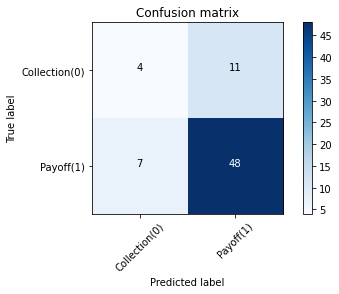

In [109]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, svm_yhat_best, labels=[0,1])
#print (classification_report(y_test, svm_yhat_best))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Collection(0)','Payoff(1)'],normalize= False,  title='Confusion matrix')

In [111]:
print('Train set SVM Jaccard index:', jaccard_score(y_train, svm_model_best.predict(X_train), pos_label=1))
print('Test set SVM Jaccard index:', jaccard_score(y_test, svm_yhat_best, pos_label=1))
print('\n')
print('Train set SVM F1 score:', f1_score(y_train, svm_model_best.predict(X_train), average='weighted'))
print('Test set SVM F1 score:', f1_score(y_test, svm_yhat_best, average='weighted'))

Train set SVM Jaccard index: 0.7560975609756098
Test set SVM Jaccard index: 0.7272727272727273


Train set SVM F1 score: 0.7682165861513688
Test set SVM F1 score: 0.7275882012724117


# Logistic Regression


### Looking for best approach

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [114]:
approach_lr = ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag')
for k in (approach_lr):
    lr_model = LogisticRegression(C = 0.01, solver = k).fit(X_train, y_train)
    lr_yhat = lr_model.predict(X_test)
    y_prob = lr_model.predict_proba(X_test)
    print('When Solver is {}, logloss is : {}'.format(k, log_loss(y_test, y_prob)))

When Solver is lbfgs, logloss is : 0.4920179847937498
When Solver is saga, logloss is : 0.4920189496931425
When Solver is liblinear, logloss is : 0.5772287609479654
When Solver is newton-cg, logloss is : 0.492017801467927
When Solver is sag, logloss is : 0.49201285971426767


In [118]:
lr_model_best = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
lr_yhat_best = lr_model_best.predict(X_test)
lr_yhat_prob = lr_model_best.predict_proba(X_test)

Confusion matrix, without normalization
[[ 2 13]
 [ 9 46]]


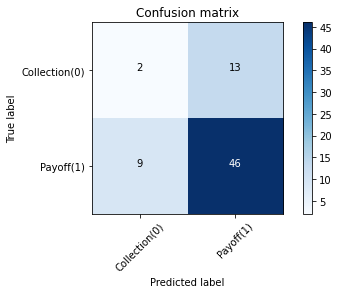

In [119]:
# Compute confusion matrix
cnf_matrix_lr = confusion_matrix(y_test, lr_yhat_best, labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_lr, classes=['Collection(0)','Payoff(1)'],normalize= False,  title='Confusion matrix')

In [121]:
print('Train set LG Jaccard index:', jaccard_score(y_train, lr_model_best.predict(X_train), pos_label=1))
print('Test set LG Jaccard index:', jaccard_score(y_test, lr_yhat_best, pos_label=1))
print('\n')
print('Train set LG F1 score:', f1_score(y_train, lr_model_best.predict(X_train), average='weighted'))
print('Test set LG F1 score:', f1_score(y_test, lr_yhat_best, average='weighted'))
print('\n')
print('Test set LG LogLoss:', log_loss(y_test, lr_yhat_prob))

Train set LG Jaccard index: 0.7351778656126482
Test set LG Jaccard index: 0.6764705882352942


Train set LG F1 score: 0.7341146337750953
Test set LG F1 score: 0.6670522459996144


Test set LG LogLoss: 0.5772287609479654


# Model Evaluation using Test set


In [117]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [161]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-03-03 13:59:50--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-03-03 13:59:50 (63.0 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [162]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [163]:
# data processing
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)


x_loan_test = Feature1
x_loan_test = preprocessing.StandardScaler().fit(x_loan_test).transform(x_loan_test)

y_loan_test = test_df['loan_status'].values

In [164]:
# Jaccard

# KNN
knn_yhat = knn_model_best.predict(x_loan_test)
jacc1 = round(jaccard_score(y_loan_test, knn_yhat, pos_label='PAIDOFF'), 2)

# Decision Tree
dt_yhat = dt_model_best.predict(x_loan_test)
jacc2 = round(jaccard_score(y_loan_test, dt_yhat, pos_label='PAIDOFF'), 2)

In [165]:
# F1_score

# KNN
knn_yhat = knn_model_best.predict(x_loan_test)
f1 = round(f1_score(y_loan_test, knn_yhat, average = 'weighted'), 2)

# Decision Tree
dt_yhat = knn_model_best.predict(x_loan_test)
f2 = round(f1_score(y_loan_test, dt_yhat, average = 'weighted'), 2)

In [166]:
test_df.replace(['COLLECTION', 'PAIDOFF'], ['0','1'], inplace = True)

In [167]:
test_df['loan_status'] = test_df['loan_status'].astype(int)

In [168]:
y_loan_test_dummy = test_df['loan_status'].values

In [169]:
# Jaccard continue

# Support Vector Machine
svm_yhat = svm_model_best.predict(x_loan_test)
jacc3 = round(jaccard_score(y_loan_test_dummy, svm_yhat), 2)

# Logistic Regression
lr_yhat = lr_model_best.predict(x_loan_test)
jacc4 = round(jaccard_score(y_loan_test_dummy, lr_yhat), 2)

In [170]:
jss = [jacc1, jacc2, jacc3, jacc4]
jss

[0.67, 0.74, 0.78, 0.74]

In [171]:
# F1_score continue

# Support Vector Machine
svm_yhat = svm_model_best.predict(x_loan_test)
f3 = round(f1_score(y_loan_test_dummy, svm_yhat, average = 'weighted'), 2)

# Logistic Regression
lr_yhat = lr_model_best.predict(x_loan_test)
f4 = round(f1_score(y_loan_test_dummy, lr_yhat, average = 'weighted'), 2)

In [172]:
f1_list = [f1, f2, f3, f4]
f1_list

[0.66, 0.66, 0.76, 0.66]

In [173]:
# log loss

# Logistic Regression
lr_prob = lr_model_best.predict_proba(x_loan_test)
ll_list = ['NA','NA','NA', round(log_loss(y_loan_test_dummy, lr_prob), 2)]
ll_list

['NA', 'NA', 'NA', 0.57]

In [174]:
columns = ['KNN', 'DT', 'SVM', 'LR']
index = ['Jaccard', 'F1-score', 'Logloss']

accuracy_df = pd.DataFrame([jss, f1_list, ll_list], index = index, columns = columns)
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score,Logloss
KNN,0.67,0.66,NA
DT,0.74,0.66,NA
SVM,0.78,0.76,NA
LR,0.74,0.66,0.57


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.73       | 0.71        | NA      |
| Decision Tree      | 0.57       | 0.64        | NA      |
| SVM                | 0.72       | 0.72        | NA      |
| LogisticRegression | 0.67       | 0.67        | 0.58       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
